Business Scenario
A retail bank runs marketing campaigns to sell term deposit plans to customers.
Calling every customer is expensive and inefficient.
The bank wants a rule-based system that can decide:
“Should we contact this customer or not?”
Management prefers a model whose decisions can be:
Clearly explained
Converted into if–else rules
Understood by non-technical staff

Tasks

1. Load the dataset and understand customer attributes such as:
Age
o Job
o Balance
o Loan status
Contact history
2. Identify input features that may influence whether a customer subscribes to a
term deposit.
3. Build a model that can classify customers into:
o Likely to subscribe
o Not likely to subscribe
4. Train the model using historical customer data.
5. Predict the outcome for unseen customer records.
6. Evaluate the model's performance using suitable classification metrics.
7. Visualize the decision-making logic of the model.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
df=pd.read_csv('bank_marketing_dataset.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [40]:
df.shape

(11162, 17)

In [41]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [42]:
num_cols = df.select_dtypes(include=['int64']).columns
print(num_cols)


Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


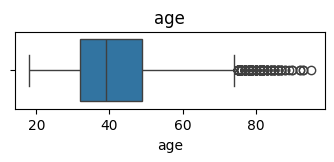

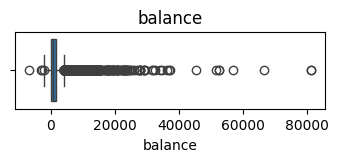

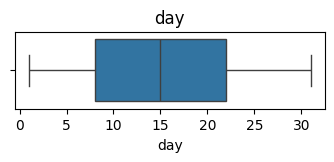

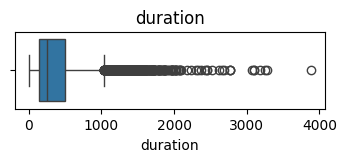

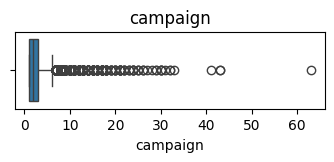

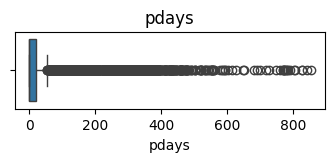

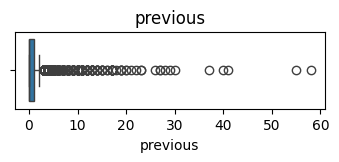

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(4,1))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [44]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return data[(data[column] >= lower) & (data[column] <= upper)]


In [45]:
cols_to_clean = ['balance', 'duration', 'campaign']
for col in cols_to_clean:
    df = remove_outliers_iqr(df, col)


In [46]:
df.shape  


(8998, 17)

In [47]:
X=df.drop('deposit',axis=1)
y=df['deposit']

<Axes: xlabel='balance'>

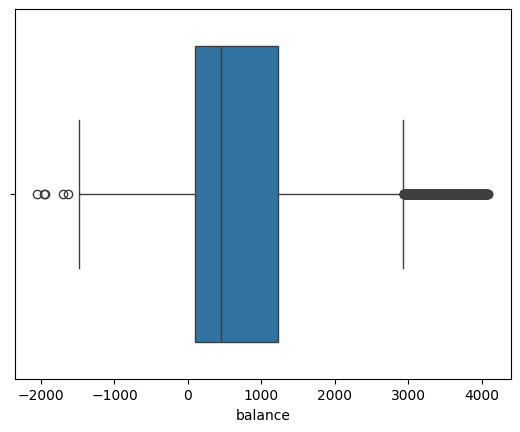

In [48]:
sns.boxplot(x=df['balance'])


<Axes: xlabel='duration'>

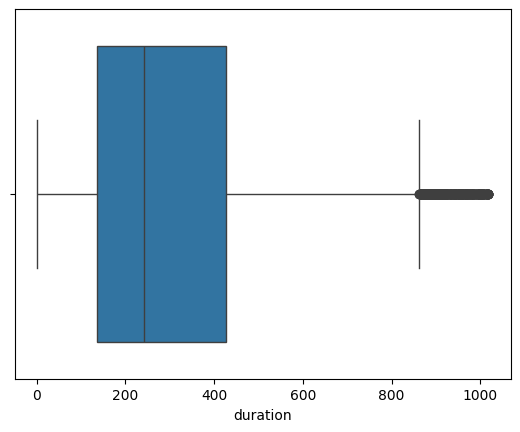

In [49]:
sns.boxplot(x=df['duration'])


<Axes: xlabel='campaign'>

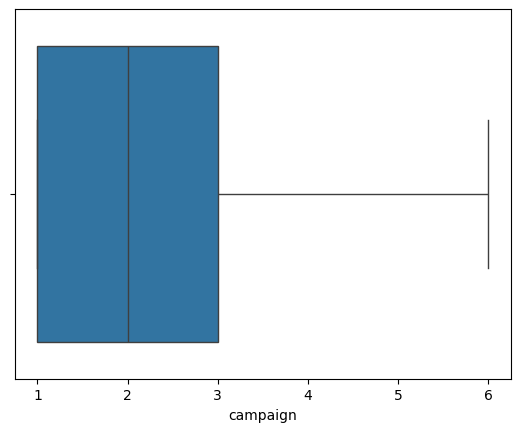

In [50]:
sns.boxplot(x=df['campaign'])


In [51]:
from sklearn.tree import DecisionTreeClassifier,plot_tree


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)

In [53]:
cols=X_train.select_dtypes(include='object').columns
print(cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cols:
    X_train[col]=le.fit_transform(X_train[col])
    X_test[col]=le.transform(X_test[col])

In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(
    criterion="entropy",
    max_depth=4
)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [56]:
y_pred=classifier.predict(X_test)
y_pred

array(['yes', 'yes', 'yes', ..., 'no', 'yes', 'no'],
      shape=(1800,), dtype=object)

In [57]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy Score:{accuracy:.2f}")

Accuracy Score:0.74


In [58]:
from sklearn.metrics import classification_report
print("Classification report:",classification_report(y_test,y_pred))

Classification report:               precision    recall  f1-score   support

          no       0.74      0.83      0.78      1001
         yes       0.75      0.64      0.69       799

    accuracy                           0.74      1800
   macro avg       0.75      0.73      0.74      1800
weighted avg       0.75      0.74      0.74      1800



In [59]:
from sklearn.metrics import confusion_matrix
print("confusion Matrix\n")
print(confusion_matrix(y_test,y_pred))

confusion Matrix

[[831 170]
 [289 510]]


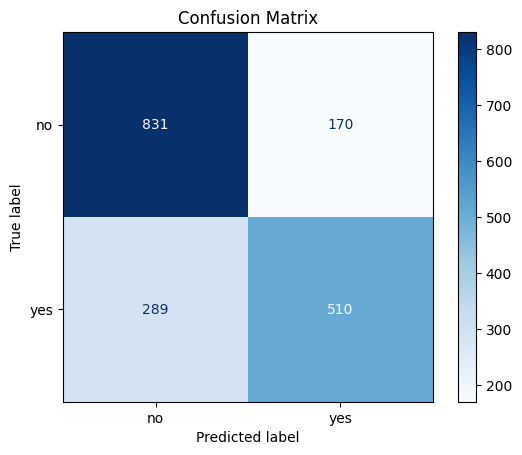

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap="Blues",
    values_format="d"
)
plt.title("Confusion Matrix")
plt.show()

8. Interpret the learned rules in simple business language.
9. Answer the following questions:
o Which customer attribute appears at the top of the decision logic?
Why do you think this attribute is important?
10. Analyze model behavior:
What happens if the model becomes too deep?
o How does limiting the depth affect decision quality?
11. Based on your analysis:
o Would you recommend this model to the bank?
Why is this approach better than a "black-box" model in this case?

8. 